#Keras_cv instalation

In [2]:
!pip install -q --upgrade keras-cv

In [3]:
#uncoment to have time displayed on every cell

# !pip install ipython-autotime
# %load_ext autotime

#Imports

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from cv2 import threshold, imread
#import tensorflow as tf
#import functions
from keras.utils import load_img
# from keras_cv.layers import Resizing, NonMaxSuppression
# from keras.optimizers import SGD
# from keras_cv import visualization
# from keras_cv.callbacks import PyCOCOCallback
# from keras_cv.models import YOLOV8Detector

2024-03-14 12:45:37.917933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 12:45:44.187913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-14 12:45:44.188215: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-14 12:45:44.982116: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-14 12:45:56.695124: W tensorflow/stream_executor/platform/de

#Define Paths

In [34]:
from skimage.exposure import is_low_contrast
from tensorflow.image import rgb_to_grayscale
from cv2 import threshold, imread


In [10]:
from cv2 import THRESH_BINARY, THRESH_OTSU

In [11]:
from tensorflow.io import is_jpeg

In [40]:
def image_preprocessing(image_path) -> np.array:
    # 1 Convert RBG in Grayscale
    gray_image = imread(image_path, 0)

    # 3 Binarization image
    image_binary = threshold(gray_image, 0, 255, THRESH_BINARY + THRESH_OTSU)

    preprocessed_img = np.expand_dims(image_binary[1], axis=-1)


    # 2 Resize image to 254x254 with padding
    # resized_image = resize_with_pad(
    #     gray_image,
    #     target_height=height,
    #     target_width=width,
    #     method="area",
    #     antialias=False
    # )

    return preprocessed_img

In [12]:
is_jpeg(single_img)

In [ ]:
from nolatex.ml_logic.preprocessing import image_preprocessing

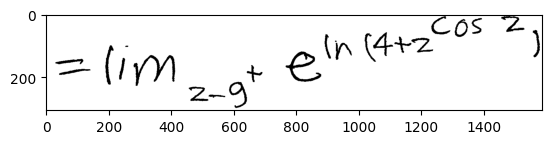

In [41]:
# single_img = load_img(img_path)
# single_img = np.array(single_img)
preprocessed_img = image_preprocessing(img_path)

plt.imshow(preprocessed_img, cmap="gray")

In [29]:
preprocessed_img.shape

(306, 1586, 1)

In [5]:
full_json_path = "/content/drive/MyDrive/Pitch/batch_1/JSON/kaggle_data_1.json"
img_folder_path = "//content/drive/MyDrive/Pitch/batch_1/background_images_sample/images_16"

In [31]:
img_path = "/home/chilleex/code/ChilleeX/NoLaTeX/initial_test_data/batch_1_salmple100/0a0a8e28-4f48-4bad-8627-cbdde64c12bb.jpg"

#Define Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from cv2 import threshold, imread
from skimage.exposure import is_low_contrast
from tensorflow import ragged
from nolatex.ml_logic.preprocessing import image_preprocessing, is_low_contrast_from_path


2024-03-14 16:42:49.781632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 16:42:55.788708: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/chilleex/.pyenv/versions/3.10.6/envs/NoLaTeX/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-14 16:42:55.788879: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-14 16:42:56.147224: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plug

In [11]:
def load_dataset(
    img_dir: str, json_path: str,
    low_contrast_threshold: float=.09,
    save_low_contrast_imgs: bool=True
    ) -> (dict, dict):

    ##################################
    # 1 Load initial data from paths #
    ##################################

    # 1 Read the full json file from json_path to pd.Dataframe
    json = pd.read_json(json_path)

    # 2 Loading the image filename list from img_dir
    dir_files = os.listdir(img_dir)

    ################################
    # 2 Preprocess and load images #
    ################################

    # Creating the preprocessed image list
    preprocessed_imgs = []
    preprocessed_img_names = []
    low_contrast_imgs = []
    low_contrast_imgs_names = []

    for filename in dir_files:                                              # Interating over the filename list
        img_path = os.path.join(img_dir, filename)                          # Creating the image path

        if is_low_contrast_from_path(img_path, low_contrast_threshold):     # Check if the image is low-contrast
            if save_low_contrast_imgs:                                      # Check if low contrast images should be saved

                # Save low contrast images and image filenames in lists
                low_contrast_imgs_names.append(filename)
                image = imread(img_path)
                low_contrast_imgs.append(image)

        else:

            # Preprocess rest of images and save them and image filenames in lists
            preprocessed_img_names.append(filename)
            image = image_preprocessing(img_path)
            preprocessed_imgs.append(image)

    ##########################################
    # 3 Loading required data from full json #
    ##########################################

    uuids = [file.replace('.jpg','') for file in dir_files]
    matches = json["uuid"].isin(uuids)
    indices = np.where(matches)[0]
    index_list = indices.tolist()
    json_ds = json[json.index.isin(index_list)]
    json_ds.reset_index(drop=True, inplace=True)

    #####################################
    # 4 Loading required bounding boxes #
    #####################################

    bboxs = []
    for img_pos in range(len(json_ds['image_data'])):
        X = json_ds['image_data'][img_pos]['xmins_raw']
        Y = json_ds['image_data'][img_pos]['ymins_raw']
        W = np.array(json_ds['image_data'][img_pos]['xmaxs_raw']) - np.array(json_ds['image_data'][img_pos]['xmins_raw'])
        H = np.array(json_ds['image_data'][img_pos]['ymaxs_raw']) - np.array(json_ds['image_data'][img_pos]['ymins_raw'])
        bbox = [[X[i],Y[i],W[i],H[i]] for i in range(len(X))]
        bboxs.append(bbox)
    bboxs = ragged.constant(bboxs)

    #########################################
    # 5 Loading required Latex Code Targets #
    #########################################
    #extracting classes
    classes = [json_ds['image_data'][index]['visible_latex_chars'] for index in range(len(json_ds['image_data']))]
    #Class_ids contais the unique classes
    class_ids = list(set([ele for sublist in classes for ele in sublist]))
    #mapping the classes
    mapping = {string: _ for _, string in enumerate(class_ids)}
    #converting the classes to numbers
    classes = [list(map(mapping.get, ele)) for ele in classes]
    classes = ragged.constant(classes)
    #defining the right class mapping fo the model(inverse as mapping)
    class_mapping = dict(zip(range(len(class_ids)), class_ids))

    ##################################
    # 6 Contructing final dictionary #
    ##################################

    final_dict = {"images": preprocessed_imgs,"bounding_boxes":{"classes": classes , "boxes": bboxs}}


    return final_dict, class_mapping, (low_contrast_imgs_names, low_contrast_imgs)


In [2]:
json_path = "../raw_data/JSON Kaggle Dataset/kaggle_data_1.json"
img_dir = "../initial_test_data/batch_1_salmple100"

In [3]:
from nolatex.ml_logic.utils import load_dataset

In [4]:
dataset, class_mapping, low_contrast_imgs = load_dataset(img_dir=img_dir, json_path=json_path)

2024-03-14 16:43:47.691837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/chilleex/.pyenv/versions/3.10.6/envs/NoLaTeX/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-14 16:43:47.701171: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-14 16:43:47.703381: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-DG8HRSA): /proc/driver/nvidia/version does not exist
2024-03-14 16:43:47.751383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler

In [6]:
from sys import getsizeof

In [7]:
getsizeof(dataset)

232

In [6]:
def resample_json(img_path, full_json_path):
  """takes a path to a folder of images and the path to the JSON file
  returns a dataframe with only the rows corresponding to the pictures in the file"""
  json = pd.read_json(full_json_path)
  dir_files = os.listdir(img_path)
  uuids = [file.replace('.jpg','') for file in dir_files]
  matches = json["uuid"].isin(uuids)
  indices = np.where(matches)[0]
  index_list = indices.tolist()
  json_resampled = json[json.index.isin(index_list)]
  json_resampled.reset_index(drop=True, inplace=True)
  return json_resampled

def load_to_dict(img_path, df):
  #Formating bounding boxes in XYWH format
  bboxs = []
  for img_pos in range(len(df['image_data'])):
    X = df['image_data'][img_pos]['xmins_raw']
    Y = df['image_data'][img_pos]['ymins_raw']
    W = np.array(df['image_data'][img_pos]['xmaxs_raw']) - np.array(df['image_data'][img_pos]['xmins_raw'])
    H = np.array(df['image_data'][img_pos]['ymaxs_raw']) - np.array(df['image_data'][img_pos]['ymins_raw'])
    bbox = [[X[i],Y[i],W[i],H[i]] for i in range(len(X))]
    bboxs.append(bbox)
  bboxs = tf.ragged.constant(bboxs)
  #loading images
  file_names = "/" + df["uuid"] + ".jpg"
  images = [np.array(load_img(img_path + file_name)) for file_name in file_names]
  images = tf.ragged.constant(images)

  #extracting classes
  classes = [df['image_data'][index]['visible_latex_chars'] for index in range(len(df['image_data']))]
  #Class_ids contais the unique classes
  class_ids = list(set([ele for sublist in classes for ele in sublist]))
  #mapping the classes
  mapping = {string: _ for _, string in enumerate(class_ids)}
  #converting the classes to numbers
  classes = [list(map(mapping.get, ele)) for ele in classes]
  classes = tf.ragged.constant(classes)
  #defining the right class mapping fo the model(inverse as mapping)
  class_mapping = dict(zip(range(len(class_ids)), class_ids))

  #Loading things into the dict
  final_dict = {"images": images,"bounding_boxes":{"classes": classes , "boxes": bboxs}}

  return final_dict, class_mapping

#Visualisation function from example notebook
def visualize_detections(model, dataset, bounding_box_format):
  images, y_true = next(iter(dataset.take(1)))
  y_pred = model.predict(images)
  visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred,
        scale=4,
        rows=2,
        cols=2,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )

#Load Data into the right format

In [7]:
df = resample_json(img_folder_path, full_json_path)

In [8]:
data, class_mapping = load_to_dict(img_folder_path, df)
#managed to load 16 images in 2 minutes, colab breaks every time I try 100 images

In [9]:
inference_resizing = Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [10]:
resized_data = inference_resizing(data)

In [11]:
num_classes = len(class_mapping)

#Starting the model

In [12]:
#Set model Params here
backbone_model = "resnet50_imagenet"
#Optimizer Params
base_lr = 0.005
momentum = 0.9
global_clipnorm = 10.0
#Loss Params
classification_loss = "binary_crossentropy"
box_loss = "ciou"
#Train Params
number_epochs = 1

In [13]:
model = YOLOV8Detector.from_preset(
    backbone_model,
    bounding_box_format="xywh",
    num_classes=num_classes,
)

/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [14]:
# including a global_clipnorm is extremely important in object detection tasks
optimizer = SGD(
    learning_rate=base_lr, momentum=momentum, global_clipnorm=global_clipnorm
)

In [15]:
model.compile(
    classification_loss=classification_loss,
    box_loss=box_loss,
    optimizer=optimizer,
)

In [16]:
#Needs to be tested
# coco_metrics_callback = PyCOCOCallback(
#     resized_data, bounding_box_format="xywh"
# )

In [ ]:
#by just following the example notebook I managed to train 1 epoch in 45 minutes
#did not manage to run fit with 16 images, colab breaks when reaching around the 3 min mark
model.fit(
    resized_data,
    # Run for 10-35~ epochs to achieve good scores.
    epochs=number_epochs,
    #callbacks=[coco_metrics_callback]
)

#Ploting predict

In [ ]:
test_image_path = "/content/drive/MyDrive/Pitch/test data/example_img.jpg"
image_test = load_img(test_image_path)
image_test = np.array(image_test)
image_test_resized = inference_resizing([image_test])

In [ ]:
#Simple visualization (Already tested)
y_pred = model.predict(image_test_resized)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_test_resized,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

In [ ]:
#Needs to be tested
model.prediction_decoder = NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=0.5,
    confidence_threshold=0.75,
)
visualize_detections(model, dataset=visualization_ds, bounding_box_format="xywh")

# visualization_ds on example notebook is en evaluation set
# visualization_ds = eval_ds.unbatch()
# visualization_ds = visualization_ds.ragged_batch(16)
# visualization_ds = visualization_ds.shuffle(8)

#Experimental Stuff


In [ ]:
class VisualizeDetections(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        visualize_detections(
            self.model, bounding_box_format="xywh", dataset=visualization_ds
        )
